**Amitoj Singh, Student id: 300849540**

Variables	Dict.

1. Age: 	Age of the participants (25-30, 31-35, 36-40, 41-45, 46-50, 51-55, 55-60)
2. Gender:	Participant gender (1-Male, 2-Female)
3. Type:	Type of Enterprise (1-5 Scale)
4. Profit	Overall Satisfaction level of the participants (1-10 scale)
5. P_average:	Average of Persuasion (1-5 Scale)
6. SPECIFY:	Type of Industry
7. SA_average:	Average of Social Adaptability (1-5 Scale)
8. SP_Average:	Average of Social Perception (1-5 Scale)
9. EE_average:	Average of Emotional Expressivity (1-5 Scale)
10. N(Af)_Av:	Average of Need for Affiliation (1-5 Scale)
11. N(Dom):	Average of Need for Dominance (1-5 Scale)
12. N(Ach):	Average of Need for Achievement (1-5 Scale)
13. N(Aut):	Average of Need for Autonomy (1-5 Scale)
14. EO-I:	Entrepreneurial Orientation-Innovation (1-5 Scale)
15. EO-P:	Entrepreneurial Orientation-Proactiveness (1-5 Scale)
16. EO-R:	Entrepreneurial Orientation-Risk Taking (1-5 Scale)
17. SP_Average.1:	Average of Self-promotion (1-5 Scale)
18. SUP_Average:	Average of Supplication (1-5 Scale)
19. SM_Average:	Average of Self-Monitoring (1-5 Scale)
20. INT_aver:	Average of Intimidation (1-5 Scale)
21. ING_Av:	Average of Ingratiation (1-5 Scale)
22. Ex_Average:	Average of Exemplification (1-5 Scale)
23. SG_Aver:	Average of Self- Glorification (1-5 Scale)
24. BIDR_AVER:	Average of balanced inventory of desired response (1-5 Scale)
25. Founder	 Founder in participants (0-Non founder, 1- Founder)
26. Work Satisfaction	Average of work satisfaction of the participant (1-5 Scale)


#Import Library

In [ ]:
#Import required packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn import metrics
import matplotlib.pylab as plt
!pip install dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary,gainsChart, liftChart
from dmba.metric import AIC_score
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus

     |████████████████████████████████| 11.8 MB 5.1 MB/s 
no display found. Using non-interactive Agg backend


In [ ]:
#upload dataset
survey = pd.read_excel('Amitoj_2_Capstone_dataset.xlsx')
survey.head()

,2 Age,4 Gender,6 Type,8 profit,P average,7 SPECIFY,SA average,SP Average,EE average,N(Af) Av,N(Dom),N(Ach),N(Aut),EO-I,EO-P,E0-R,SP Average.1,SUP Average,SM Average,INT aver,ING Av,Ex Average,SG Aver,BIDR AVER,5 Founder,Work_Satisfaction
0,7,1,1,3,3.4,PAINT,3.75,3.000000,0.333333,4.285714,4.555556,4.000000,4.3,5.000000,4.714286,4.00,5.00,1.0,2.000000,2.2,2.333333,1.333333,3.8,1.0,1,3.857143
1,6,1,2,4,3.2,SPORTS,2.75,2.142857,0.666667,4.714286,3.777778,3.428571,3.8,5.000000,4.428571,3.00,2.25,2.4,2.857143,4.2,2.333333,1.000000,4.8,2.0,1,3.428571
2,6,2,4,4,1.6,DATA PROCESSNG,3.25,2.285714,1.666667,3.857143,3.333333,3.285714,2.3,3.000000,3.142857,3.25,4.00,2.6,1.571429,2.0,4.000000,2.333333,1.8,2.2,0,3.000000
3,6,1,1,4,4.0,FOOD,4.00,3.428571,0.000000,4.428571,4.777778,4.285714,3.5,5.000000,4.428571,4.25,3.75,4.6,3.142857,2.2,5.000000,4.333333,3.4,3.8,1,4.285714
4,7,1,2,5,2.4,FOOD,3.75,2.571429,2.333333,3.428571,3.333333,4.714286,2.7,4.428571,3.857143,3.00,3.75,4.6,3.142857,2.2,5.000000,4.333333,3.4,3.8,1,4.142857


In [ ]:
survey.columns

Index(['2 Age', '4 Gender', '6 Type', '8 profit', 'P average', '7 SPECIFY',
       'SA average', 'SP Average', 'EE average', 'N(Af) Av', 'N(Dom)',
       'N(Ach)', 'N(Aut)', 'EO-I', 'EO-P', 'E0-R', 'SP Average.1',
       'SUP Average', 'SM Average', 'INT aver', 'ING Av', 'Ex Average',
       'SG Aver', 'BIDR AVER', '5 Founder', 'Work_Satisfaction'],
      dtype='object')

#Data Cleaning

Remove number and space from columns name

In [ ]:
survey.columns = survey.columns.str.strip('6 ')
survey.columns = survey.columns.str.strip('4 ')
survey.columns = survey.columns.str.strip('5 ')
survey.columns = survey.columns.str.strip('2 ')
survey.columns = survey.columns.str.strip('8 ')
survey.columns = survey.columns.str.strip('7 ')
survey.columns = survey.columns.str.replace(' ', '_')
survey.columns

Index(['Age', 'Gender', 'Type', 'profit', 'P_average', 'SPECIFY', 'SA_average',
       'SP_Average', 'EE_average', 'N(Af)_Av', 'N(Dom)', 'N(Ach)', 'N(Aut)',
       'EO-I', 'EO-P', 'E0-R', 'SP_Average.1', 'SUP_Average', 'SM_Average',
       'INT_aver', 'ING_Av', 'Ex_Average', 'SG_Aver', 'BIDR_AVER', 'Founder',
       'Work_Satisfaction'],
      dtype='object')

#Data Exploration

In [ ]:
print(survey.describe())
print(survey.dtypes.value_counts())

              Age      Gender  ...     Founder  Work_Satisfaction
count  420.000000  420.000000  ...  420.000000         420.000000
mean     5.742857    1.142857  ...    0.676190           4.044898
std      1.828068    0.350344  ...    0.468486           0.742620
min      2.000000    1.000000  ...    0.000000           1.857143
25%      5.000000    1.000000  ...    0.000000           3.571429
50%      5.000000    1.000000  ...    1.000000           3.857143
75%      7.000000    1.000000  ...    1.000000           4.714286
max      9.000000    2.000000  ...    1.000000           5.000000

[8 rows x 25 columns]
float64    20
int64       5
object      1
dtype: int64


**As these are ordinal values, hence, we will not consider any skewness or ketosis (King et al., 2011)**

**Check if dataset has any Missing value**

In [ ]:
survey.isnull().sum()

Age                  0
Gender               0
Type                 0
profit               0
P_average            0
SPECIFY              0
SA_average           0
SP_Average           0
EE_average           0
N(Af)_Av             0
N(Dom)               0
N(Ach)               0
N(Aut)               0
EO-I                 0
EO-P                 0
E0-R                 0
SP_Average.1         0
SUP_Average          0
SM_Average           0
INT_aver             0
ING_Av               0
Ex_Average           0
SG_Aver              0
BIDR_AVER            0
Founder              0
Work_Satisfaction    0
dtype: int64

*This dataset is very clean with no missing values and outliers*

**Correlation Heatmap**

**Correlation analysis**

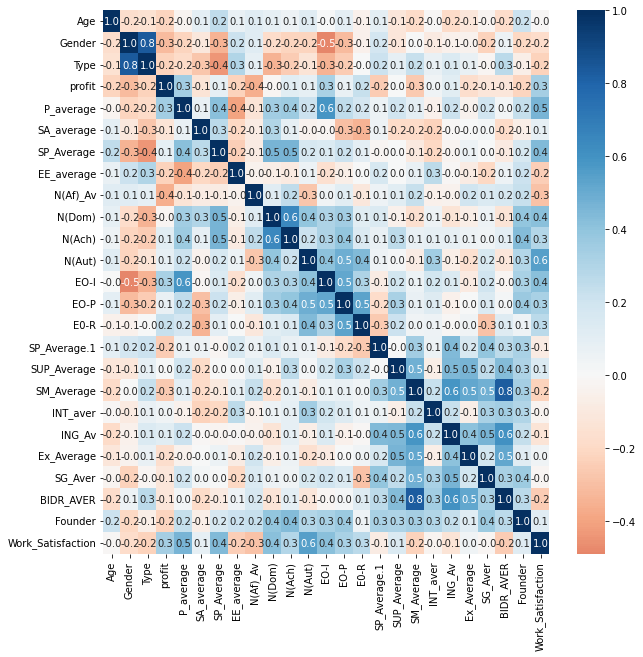

In [ ]:
#Correlation of survey datset
corr = survey.corr().round(2)
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

**No Strong correlation has been found between input variables**

**Visualisation of the data (It is mainly done on Tableau. Please see the model document***

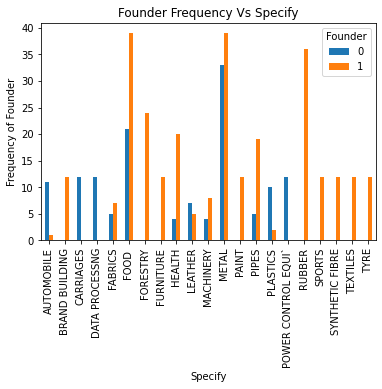

In [ ]:
%matplotlib inline
pd.crosstab(survey.SPECIFY, survey.Founder).plot(kind='bar')
plt.title('Founder Frequency Vs Specify')
plt.xlabel('Specify')
plt.ylabel('Frequency of Founder')
plt.savefig('Founder')

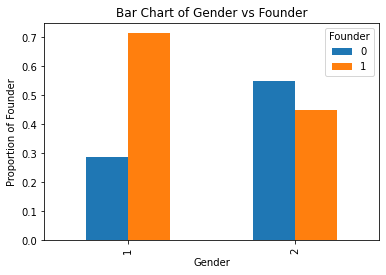

In [ ]:
table=pd.crosstab(survey.Gender, survey.Founder)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False)
plt.title('Bar Chart of Gender vs Founder')
plt.xlabel('Gender')
plt.ylabel('Proportion of Founder')
plt.savefig('Gender vs Founder')

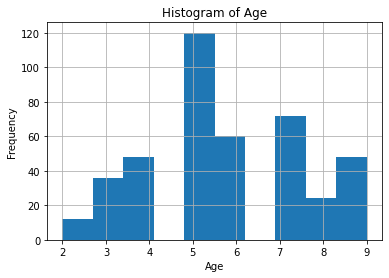

In [ ]:
survey.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

**Converting SPECIFY variable in to dummies**

In [ ]:
survey1= survey.copy()
cat_vars=['SPECIFY']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(survey1[var], prefix=var)
    survey_1=survey1.join(cat_list)
    survey1=survey_1
cat_vars=['SPECIFY']
data_vars=survey1.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
survey_final = pd.DataFrame(survey1[to_keep])
survey_final

,Age,Gender,Type,profit,P_average,SA_average,SP_Average,EE_average,N(Af)_Av,N(Dom),N(Ach),N(Aut),EO-I,EO-P,E0-R,SP_Average.1,SUP_Average,SM_Average,INT_aver,ING_Av,Ex_Average,SG_Aver,BIDR_AVER,Founder,Work_Satisfaction,SPECIFY_AUTOMOBILE,SPECIFY_BRAND BUILDING,SPECIFY_CARRIAGES,SPECIFY_DATA PROCESSNG,SPECIFY_FABRICS,SPECIFY_FOOD,SPECIFY_FORESTRY,SPECIFY_FURNITURE,SPECIFY_HEALTH,SPECIFY_LEATHER,SPECIFY_MACHINERY,SPECIFY_METAL,SPECIFY_PAINT,SPECIFY_PIPES,SPECIFY_PLASTICS,SPECIFY_POWER CONTROL EQUI`,SPECIFY_RUBBER,SPECIFY_SPORTS,SPECIFY_SYNTHETIC FIBRE,SPECIFY_TEXTILES,SPECIFY_TYRE
0,7,1,1,3,3.4,3.75,3.000000,0.333333,4.285714,4.555556,4.000000,4.300,5.000000,4.714286,4.00,5.00,1.0,2.000000,2.2,2.333333,1.333333,3.8,1.0,1,3.857143,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,6,1,2,4,3.2,2.75,2.142857,0.666667,4.714286,3.777778,3.428571,3.800,5.000000,4.428571,3.00,2.25,2.4,2.857143,4.2,2.333333,1.000000,4.8,2.0,1,3.428571,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,6,2,4,4,1.6,3.25,2.285714,1.666667,3.857143,3.333333,3.285714,2.300,3.000000,3.142857,3.25,4.00,2.6,1.571429,2.0,4.000000,2.333333,1.8,2.2,0,3.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,1,1,4,4.0,4.00,3.428571,0.000000,4.428571,4.777778,4.285714,3.500,5.000000,4.428571,4.25,3.75,4.6,3.142857,2.2,5.000000,4.333333,3.4,3.8,1,4.285714,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7,1,2,5,2.4,3.75,2.571429,2.333333,3.428571,3.333333,4.714286,2.700,4.428571,3.857143,3.00,3.75,4.6,3.142857,2.2,5.000000,4.333333,3.4,3.8,1,4.142857,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,9,1,1,5,3.6,3.00,3.142857,3.000000,3.571429,4.875000,4.428571,4.375,5.000000,3.857143,3.50,4.25,1.0,1.857143,5.0,1.333333,1.000000,2.6,2.2,1,4.571429,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
416,3,1,1,5,2.4,4.00,3.000000,1.000000,3.000000,4.500000,3.714286,4.125,5.000000,4.428571,3.50,1.00,1.0,1.142857,5.0,2.000000,1.000000,4.0,1.6,0,4.714286,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
417,8,1,1,3,0.8,4.00,3.000000,4.000000,3.000000,4.875000,4.000000,4.750,3.000000,3.714286,3.50,4.50,1.0,2.142857,5.0,2.333333,3.000000,2.6,1.8,1,4.285714,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
418,5,1,1,5,3.4,3.50,3.571429,0.666667,4.428571,5.000000,5.000000,3.875,4.142857,4.714286,5.00,1.75,5.0,2.142857,1.0,1.666667,3.333333,2.8,1.8,1,4.857143,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


#Modelling

#Decision Tree

In [ ]:
#Decision Tree Regressor for predicting the profit
from sklearn.tree import DecisionTreeRegressor
excludecolumn= 'SPECIFY','profit','Founder'
outcome = 'profit'
predictors = [s for s in survey.columns if s not in excludecolumn]
X = survey[predictors]
y = survey[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=111)
# user grid search to find optimized tree
param_grid = {'max_depth': [5, 10, 15, 20, 25],
'min_impurity_decrease': [0, 0.001, 0.005, 0.01],
'min_samples_split': [10, 20, 30, 40, 50],
} 
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1,)
regressor = gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008],
'min_samples_split': [14, 15, 16, 18, 20],
} 
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
regressor = gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)
regTree = gridSearch.best_estimator_
regressionSummary(train_y, regTree.predict(train_X))
regressionSummary(valid_y, regTree.predict(valid_X))

Initial parameters:  {'max_depth': 15, 'min_impurity_decrease': 0.005, 'min_samples_split': 10}
Improved parameters:  {'max_depth': 9, 'min_impurity_decrease': 0, 'min_samples_split': 14}

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.1499
            Mean Absolute Error (MAE) : 0.0450
          Mean Percentage Error (MPE) : -0.1124
Mean Absolute Percentage Error (MAPE) : 1.0115

Regression statistics

                      Mean Error (ME) : 0.0270
       Root Mean Squared Error (RMSE) : 0.1767
            Mean Absolute Error (MAE) : 0.0673
          Mean Percentage Error (MPE) : 0.4390
Mean Absolute Percentage Error (MAPE) : 1.4478


In [ ]:
#R-Square
r2_score(valid_y, regTree.predict(valid_X))

0.9578085301439533

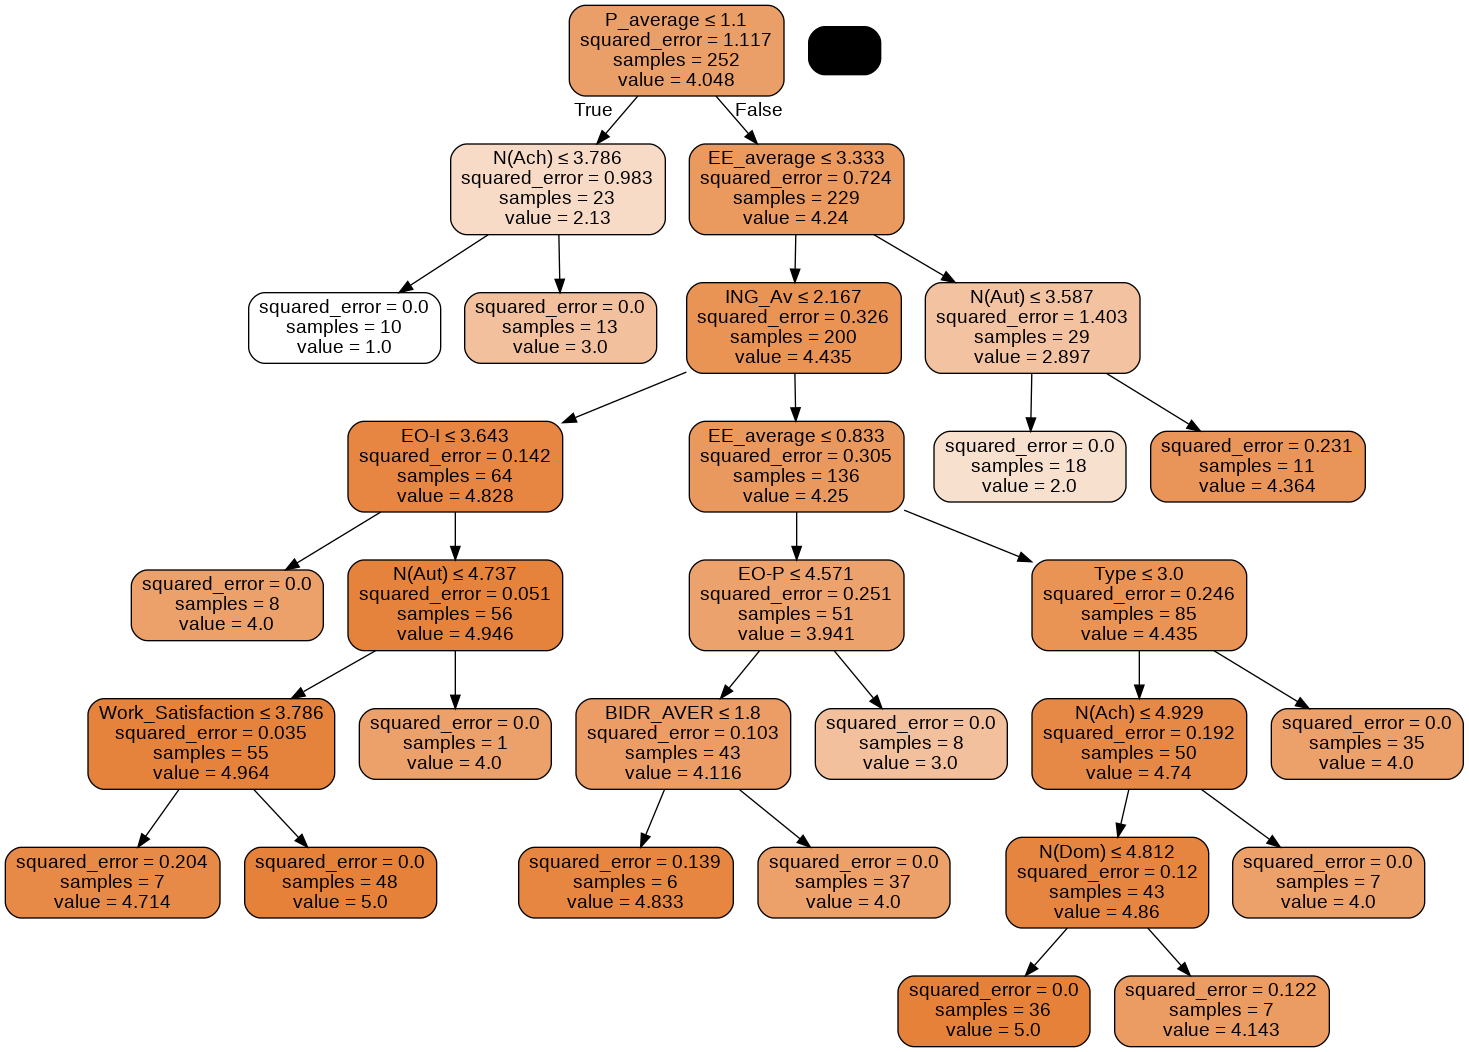

In [ ]:
#Classification Tree
dot_data1 = StringIO()
export_graphviz(regTree, out_file=dot_data1,  
                filled=True, rounded=True,
                special_characters=True,feature_names = train_X.columns)
graph1 = pydotplus.graph_from_dot_data(dot_data1.getvalue())  
graph1.write_png('survey_reg.png')
Image(graph1.create_png())

**This model is slightly overfitted as RMSE value of training data is slightly lower than the validation data**

In [ ]:
#Decision tree classifier model for classifying the founder
from sklearn.tree import DecisionTreeClassifier
excludecolumn_c= 'SPECIFY','Founder','profit'
outcome_c = 'Founder'
predictors_c = [s for s in survey.columns if s not in excludecolumn_c]
X_c = survey[predictors_c]
y_c = survey[outcome_c]
train_X_c, valid_X_c, train_y_c, valid_y_c = train_test_split(X_c, y_c, test_size=0.4, random_state=111)
# user grid search to find optimized tree
param_grid_c = {'max_depth': [5, 10, 15, 20, 25],
'min_impurity_decrease': [0, 0.001, 0.005, 0.01],
'min_samples_split': [10, 20, 30, 40, 50],
}
gridSearch_c = GridSearchCV(DecisionTreeClassifier(), param_grid_c, cv=5, n_jobs=-1)
classifier = gridSearch_c.fit(train_X_c, train_y_c)
print('Initial parameters: ', gridSearch.best_params_)
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008],
'min_samples_split': [14, 15, 16, 18, 20]
} 
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, n_jobs=-1,)
classifier = gridSearch.fit(train_X_c, train_y_c)
print('Improved parameters: ', gridSearch.best_params_)
clasTree = gridSearch.best_estimator_
print(clasTree)
classificationSummary(train_y_c, clasTree.predict(train_X_c))
classificationSummary(valid_y_c, clasTree.predict(valid_X_c))

Initial parameters:  {'max_depth': 11, 'min_impurity_decrease': 0, 'min_samples_split': 14}
Improved parameters:  {'max_depth': 6, 'min_impurity_decrease': 0.005, 'min_samples_split': 16}
DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.005,
                       min_samples_split=16)
Confusion Matrix (Accuracy 0.9167)

       Prediction
Actual   0   1
     0  77   9
     1  12 154
Confusion Matrix (Accuracy 0.9345)

       Prediction
Actual   0   1
     0  44   6
     1   5 113


In [ ]:
#Precision Score, Recall Score, F1 Score
from sklearn.metrics import precision_score, recall_score, f1_score
pred_y_c = clasTree.predict(valid_X_c)
print("Accuracy:",metrics.accuracy_score(valid_y_c, pred_y_c))
print("Precision:",metrics.precision_score(valid_y_c, pred_y_c, average="binary"))
print("Recall:",metrics.recall_score(valid_y_c, pred_y_c, average="binary"))
print("F1 Score:",metrics.f1_score(valid_y_c, pred_y_c, average="binary"))

Accuracy: 0.9345238095238095
Precision: 0.9495798319327731
Recall: 0.9576271186440678
F1 Score: 0.9535864978902954


In [ ]:
#Confusion matrix
from sklearn.metrics import  confusion_matrix
cm1 = confusion_matrix(valid_y_c, pred_y_c)
print("Confusion matrix:")
print(cm1)
tn = cm1[0][0]
fp = cm1[0][1]
fn = cm1[1][0]
tp = cm1[1][1]
print("Total number of true positives", tp)
print("Total number of false negatives",fn)
print("Total number of false positives",fp)
print("Total number of true negatives",tn)
acc=float(tp+tn)/(tp+tn+fp+fn)
print('Classifier Accuracy: %.2f%%' % (acc * 100))
tpr = float(tp)/(tp+fn)
print('True Positive Rate (TPR/Recall/Sensitivity): %.2f%%' % (tpr * 100))
specificity = float (tn)/(tn+fp)
print ("True Negative Rate (TNR/Specificity/selectivity):%.2f%%" % (specificity*100)) 
fpr = float(fp)/(fp+tn)
print("False Positive Rate (FPR): %.2f%%" % (fpr * 100))
fnr = fn/ (fn+ tp)
print("False Negative Rate (FNR): %.2f%%" % (fnr*100))
precision=float(tp)/(tp+fp)
print("Precision/Positive Predictive value:%.2f%%" %(precision*100))
fScore = 2*((precision*tpr)/(precision+tpr))
print("F1-Score: %.2f%%" %(fScore*100))

Confusion matrix:
[[ 44   6]
 [  5 113]]
Total number of true positives 113
Total number of false negatives 5
Total number of false positives 6
Total number of true negatives 44
Classifier Accuracy: 93.45%
True Positive Rate (TPR/Recall/Sensitivity): 95.76%
True Negative Rate (TNR/Specificity/selectivity):88.00%
False Positive Rate (FPR): 12.00%
False Negative Rate (FNR): 4.24%
Precision/Positive Predictive value:94.96%
F1-Score: 95.36%


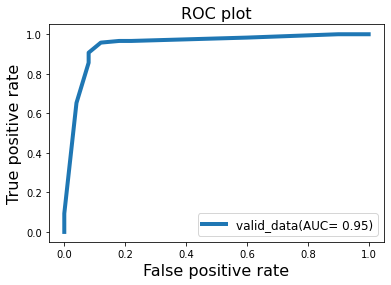

In [ ]:
#calculate probabilities for founder 
y_pred_proba = clasTree.predict_proba(valid_X_c)[::,1]

# calculate tpr and fpr values
fpr1, tpr1, _ = metrics.roc_curve(valid_y_c, y_pred_proba) 

#calculate auc value
auc = metrics.roc_auc_score(valid_y_c, y_pred_proba) 

#plot ROC curve
plt.plot(fpr1,tpr1,label="valid_data(AUC= %0.2f)" % auc, linewidth = 4)
#set the legend properties
plt.legend(prop={'size':12},loc='lower right') 
plt.title('ROC plot',fontsize = 16)
plt.xlabel('False positive rate', fontsize = 16)
plt.ylabel('True positive rate', fontsize = 16)
plt.show() #display the plot

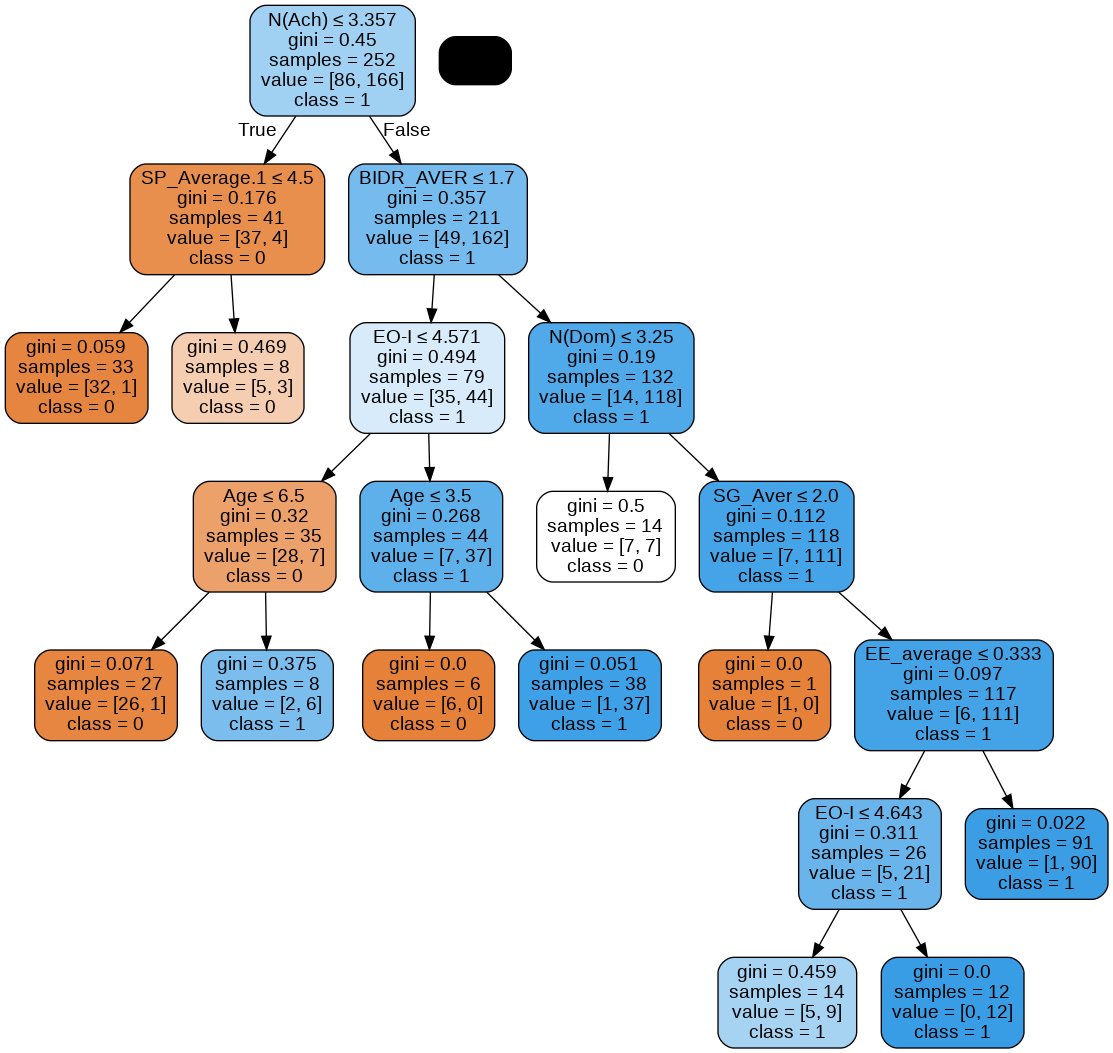

In [ ]:
#Classification tree
dot_data = StringIO()
export_graphviz(clasTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = valid_X_c.columns, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('survey.png')
Image(graph.create_png())

**This decison tree classifier model is slightly underfitted model, because accuracy for training data is lower than the validation data** 

In [ ]:
#Decision tree regressor with SPECIFY column
from sklearn.tree import DecisionTreeRegressor
excludecolumn_s= 'profit', 'Founder'
outcome_s = 'profit'
predictors_s = [s for s in survey_final.columns if s not in excludecolumn_s]
X_s = survey_final[predictors_s]
y_s = survey_final[outcome_s]
train_X_s, valid_X_s, train_y_s, valid_y_s = train_test_split(X_s, y_s, test_size=0.4, random_state=1)
# user grid search to find optimized tree
param_grid_s = {'max_depth': [5, 10, 15, 20, 25],
'min_impurity_decrease': [0, 0.001, 0.005, 0.01],
'min_samples_split': [10, 20, 30, 40, 50],
} 
gridSearch_s = GridSearchCV(DecisionTreeRegressor(), param_grid_s, cv=5, n_jobs=-1)
regressor_s = gridSearch_s.fit(train_X_s, train_y_s)
print('Initial parameters: ', gridSearch_s.best_params_)
param_grid_s = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008],
'min_samples_split': [14, 15, 16, 18, 20, ],
} 
gridSearch_s = GridSearchCV(DecisionTreeRegressor(), param_grid_s, cv=5, n_jobs=-1)
regressor_s = gridSearch_s.fit(train_X_s, train_y_s)
print('Improved parameters: ', gridSearch_s.best_params_)
regTree_s = gridSearch_s.best_estimator_
regressionSummary(train_y_s, regTree_s.predict(train_X_s))
regressionSummary(valid_y_s, regTree_s.predict(valid_X_s))

Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.001, 'min_samples_split': 10}
Improved parameters:  {'max_depth': 8, 'min_impurity_decrease': 0, 'min_samples_split': 15}

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.2152
            Mean Absolute Error (MAE) : 0.0463
          Mean Percentage Error (MPE) : -0.5787
Mean Absolute Percentage Error (MAPE) : 1.7361

Regression statistics

                      Mean Error (ME) : 0.0238
       Root Mean Squared Error (RMSE) : 0.2782
            Mean Absolute Error (MAE) : 0.0734
          Mean Percentage Error (MPE) : -0.0248
Mean Absolute Percentage Error (MAPE) : 2.4554


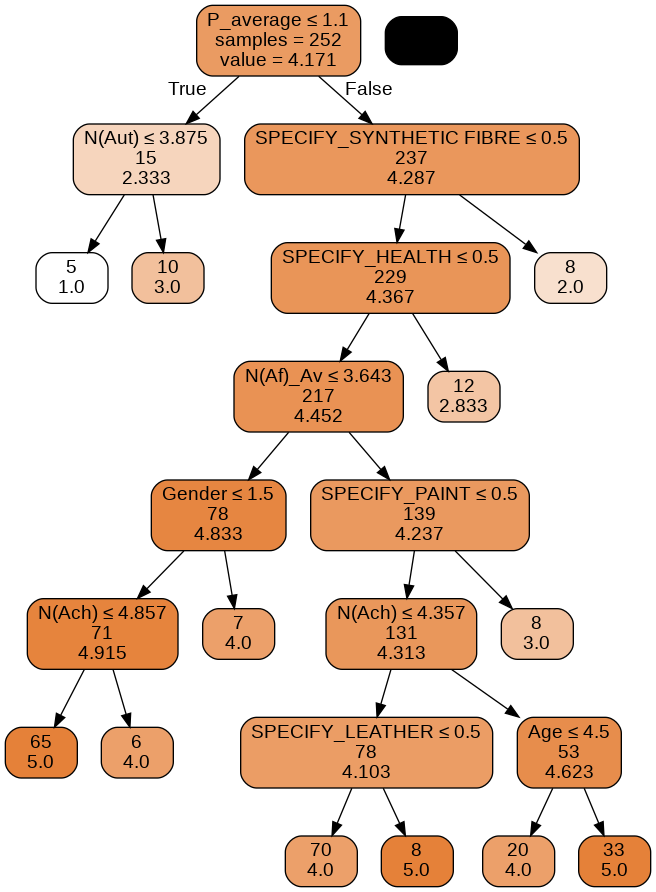

In [ ]:
#Regression tree
plotDecisionTree(regTree_s, feature_names=train_X_s.columns)

**As we have decided not to include SPECIFY columns in the analysis, therefore this model will not be considered for final model selection as it consist of an irrelevant variable (SPECIFY)**

In [ ]:
#Decision tree classifier with SPECIFY column
from sklearn.tree import DecisionTreeClassifier
excludecolumn_sc= 'profit', 'Founder','Type'
outcome_sc = 'Founder'
predictors_sc = [s for s in survey_final.columns if s not in excludecolumn_sc]
X_sc = survey_final[predictors_sc]
y_sc = survey_final[outcome_sc]
train_X_sc, valid_X_sc, train_y_sc, valid_y_sc = train_test_split(X_sc, y_sc, test_size=0.4, random_state=1)
# user grid search to find optimized tree
param_grid_sc = {'max_depth': [5, 10, 15, 20, 25],
'min_impurity_decrease': [0, 0.001, 0.005, 0.01],
'min_samples_split': [10, 20, 30, 40, 50],
} 
gridSearch_sc = GridSearchCV(DecisionTreeClassifier(), param_grid_sc, cv=5, n_jobs=-1)
classifier_sc = gridSearch_sc.fit(train_X_sc, train_y_sc)
print('Initial parameters: ', gridSearch_sc.best_params_)
param_grid_s = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008],
'min_samples_split': [14, 15, 16, 18, 20, ],
} 
gridSearch_s = GridSearchCV(DecisionTreeClassifier(), param_grid_s, cv=5, n_jobs=-1)
classifier_s = gridSearch_s.fit(train_X_sc, train_y_sc)
print('Improved parameters: ', gridSearch_s.best_params_)
clasTree_s = gridSearch_s.best_estimator_
classificationSummary(train_y_sc, clasTree_s.predict(train_X_sc))
classificationSummary(valid_y_sc, clasTree_s.predict(valid_X_sc))

Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 10}
Improved parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.002, 'min_samples_split': 15}
Confusion Matrix (Accuracy 0.9444)

       Prediction
Actual   0   1
     0  79   8
     1   6 159
Confusion Matrix (Accuracy 0.8988)

       Prediction
Actual   0   1
     0  39  10
     1   7 112


In [ ]:
#F1 Score
f1_score(valid_y_sc, clasTree_s.predict(valid_X_sc))

0.9294605809128631

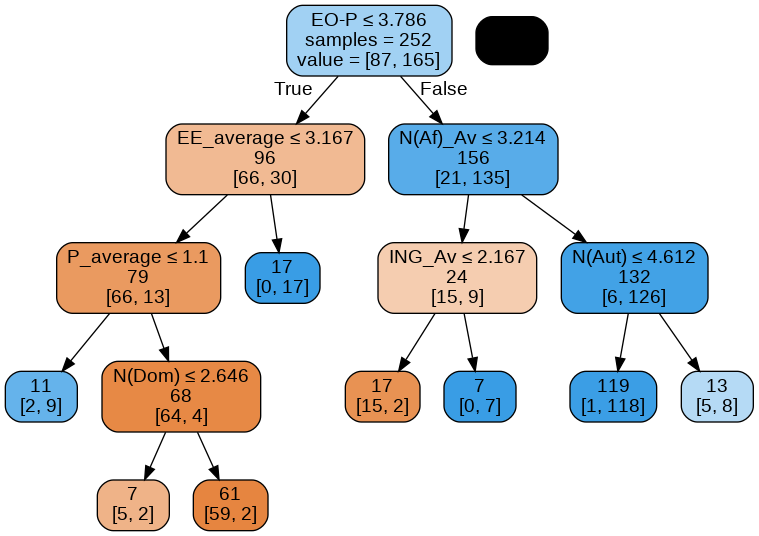

In [ ]:
#Classification Tree
plotDecisionTree(clasTree_s, feature_names=train_X_sc.columns)

**Due to the above mentioned reason this model will not pick** 

#Random Forest

              feature  importance       std
2                Type    0.004200  0.015061
1              Gender    0.006063  0.021399
19         Ex_Average    0.010321  0.021314
0                 Age    0.020090  0.034305
18             ING_Av    0.020898  0.035237
4          SA_average    0.020911  0.035732
13               E0-R    0.021652  0.039294
22  Work_Satisfaction    0.021906  0.035412
17           INT_aver    0.030194  0.048529
5          SP_Average    0.031999  0.052611
15        SUP_Average    0.036779  0.062868
6          EE_average    0.040771  0.058933
3           P_average    0.041003  0.068287
21          BIDR_AVER    0.044450  0.066662
7            N(Af)_Av    0.048706  0.073845
20            SG_Aver    0.050239  0.069534
10             N(Aut)    0.054597  0.065164
14       SP_Average.1    0.057056  0.072903
11               EO-I    0.057915  0.085013
16         SM_Average    0.060189  0.084919
8              N(Dom)    0.102464  0.112774
12               EO-P    0.10852

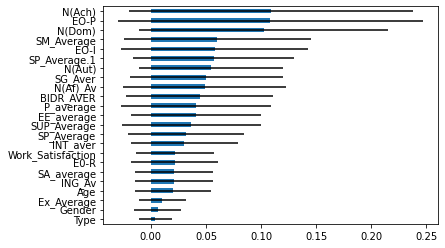

Confusion Matrix (Accuracy 0.9286)

       Prediction
Actual   0   1
     0  73  13
     1   5 161
Confusion Matrix (Accuracy 0.9167)

       Prediction
Actual   0   1
     0  42   8
     1   6 112


In [ ]:
#Random forest classifier without SPECIFY column
X_R = survey.drop(columns=['profit','Founder','SPECIFY'])
y_R = survey['Founder']
train_X_R, valid_X_R, train_y_R, valid_y_R = train_test_split(X_R, y_R, test_size=0.4, random_state=111)
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X_R, train_y_R)
# variable (feature) importance plot
rf_estimator = rf.estimators_
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
df = pd.DataFrame({'feature': train_X_R.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)
ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')
plt.show()
# confusion matrix for validation set
classificationSummary(train_y_R, rf.predict(train_X_R))
# confusion matrix for validation set
classificationSummary(valid_y_R, rf.predict(valid_X_R))

In [ ]:
#Accuracy, Precision, Recall and F1 Score
pred_y_R = rf.predict(valid_X_R)
print("Accuracy:",metrics.accuracy_score(valid_y_R, pred_y_R))
print("Precision:",metrics.precision_score(valid_y_R, pred_y_R, average="binary"))
print("Recall:",metrics.recall_score(valid_y_R, pred_y_R, average="binary"))
print("F1 Score:",metrics.f1_score(valid_y_R, pred_y_R, average="binary"))

Accuracy: 0.9166666666666666
Precision: 0.9333333333333333
Recall: 0.9491525423728814
F1 Score: 0.9411764705882353


In [ ]:
#Confusion Matrix
from sklearn.metrics import  confusion_matrix
cm2 = confusion_matrix(valid_y_R, pred_y_R)
print("Confusion matrix:")
print(cm2)
tn1 = cm2[0][0]
fp1 = cm2[0][1]
fn1 = cm2[1][0]
tp1 = cm2[1][1]
print("Total number of true positives", tp1)
print("Total number of false negatives",fn1)
print("Total number of false positives",fp1)
print("Total number of true negatives",tn1)
acc1=float(tp1+tn1)/(tp1+tn1+fp1+fn1)
print('Classifier Accuracy: %.2f%%' % (acc1 * 100))
tpr1 = float(tp1)/(tp1+fn1)
print('True Positive Rate (TPR/Recall/Sensitivity): %.2f%%' % (tpr1 * 100))
specificity1 = float (tn1)/(tn1+fp1)
print ("True Negative Rate (TNR/Specificity/selectivity):%.2f%%" % (specificity1*100)) 
fpr1 = float(fp1)/(fp1+tn1)
print("False Positive Rate (FPR): %.2f%%" % (fpr1 * 100))
fnr1 = fn1/ (fn1+ tp1)
print("False Negative Rate (FNR): %.2f%%" % (fnr1*100))
precision1=float(tp1)/(tp1+fp1)
print("Precision/Positive Predictive value:%.2f%%" %(precision1*100))
fScore1 = 2*((precision1*tpr1)/(precision1+tpr1))
print("F1-Score: %.2f%%" %(fScore1*100))

Confusion matrix:
[[ 42   8]
 [  6 112]]
Total number of true positives 112
Total number of false negatives 6
Total number of false positives 8
Total number of true negatives 42
Classifier Accuracy: 91.67%
True Positive Rate (TPR/Recall/Sensitivity): 94.92%
True Negative Rate (TNR/Specificity/selectivity):84.00%
False Positive Rate (FPR): 16.00%
False Negative Rate (FNR): 5.08%
Precision/Positive Predictive value:93.33%
F1-Score: 94.12%


**Although, Random Forest model has slightly higher training accuracy than validaion, we will consider it for final model selection. This model has very high F1 score and True value rate** 

              feature  importance       std
15        SUP_Average    0.002108  0.013792
19         Ex_Average    0.002368  0.010285
4          SA_average    0.002678  0.007325
5          SP_Average    0.003384  0.008426
20            SG_Aver    0.004275  0.012097
1              Gender    0.005820  0.018590
13               E0-R    0.005941  0.010556
16         SM_Average    0.006202  0.022785
17           INT_aver    0.010315  0.025461
21          BIDR_AVER    0.010542  0.023346
2                Type    0.014592  0.018367
9              N(Ach)    0.015308  0.026105
0                 Age    0.018816  0.037579
14       SP_Average.1    0.019593  0.031715
8              N(Dom)    0.020551  0.032884
7            N(Af)_Av    0.024294  0.044907
22  Work_Satisfaction    0.029561  0.039047
18             ING_Av    0.035385  0.035195
12               EO-P    0.041916  0.033108
10             N(Aut)    0.066802  0.070794
11               EO-I    0.081642  0.075111
6          EE_average    0.23507

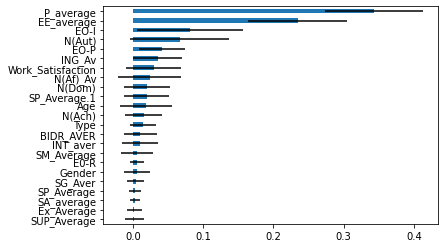


Regression statistics

                      Mean Error (ME) : 0.0015
       Root Mean Squared Error (RMSE) : 0.0348
            Mean Absolute Error (MAE) : 0.0116
          Mean Percentage Error (MPE) : -0.0470
Mean Absolute Percentage Error (MAPE) : 0.3149

Regression statistics

                      Mean Error (ME) : 0.0021
       Root Mean Squared Error (RMSE) : 0.0568
            Mean Absolute Error (MAE) : 0.0192
          Mean Percentage Error (MPE) : -0.0140
Mean Absolute Percentage Error (MAPE) : 0.4463


In [ ]:
#Random forest regressor without SPECIFY column
X_1 = survey.drop(columns=['profit','Founder','SPECIFY'])
y_1 = survey['profit']
train_X_1, valid_X_1, train_y_1, valid_y_1 = train_test_split(X_1, y_1, test_size=0.4, random_state=111)
rf_1 = RandomForestRegressor(n_estimators=500, random_state=1)
rf_1.fit(train_X_1, train_y_1)
# variable (feature) importance plot
importances_1 = rf_1.feature_importances_
std_1 = np.std([tree.feature_importances_ for tree in rf_1.estimators_], axis=0)
df_1 = pd.DataFrame({'feature': train_X_1.columns, 'importance': importances_1, 'std': std_1})
df_1 = df_1.sort_values('importance')
print(df_1)
ax = df_1.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')
plt.show()
# confusion matrix for training set
regressionSummary(train_y_1, rf_1.predict(train_X_1))
# confusion matrix for validation set
regressionSummary(valid_y_1, rf_1.predict(valid_X_1))

In [ ]:
#Calculating R-Squared
r2_score(valid_y_1, rf_1.predict(valid_X_1))

0.9956424275862069

**SUch a low RMSE value and high R2 value cannot be achieved in real life because of noise level and stochastic nature of model algorithm. Hence, we will not consider this model.**

              feature  importance       std
2                Type    0.004200  0.015061
1              Gender    0.006063  0.021399
19         Ex_Average    0.010321  0.021314
0                 Age    0.020090  0.034305
18             ING_Av    0.020898  0.035237
4          SA_average    0.020911  0.035732
13               E0-R    0.021652  0.039294
22  Work_Satisfaction    0.021906  0.035412
17           INT_aver    0.030194  0.048529
5          SP_Average    0.031999  0.052611
15        SUP_Average    0.036779  0.062868
6          EE_average    0.040771  0.058933
3           P_average    0.041003  0.068287
21          BIDR_AVER    0.044450  0.066662
7            N(Af)_Av    0.048706  0.073845
20            SG_Aver    0.050239  0.069534
10             N(Aut)    0.054597  0.065164
14       SP_Average.1    0.057056  0.072903
11               EO-I    0.057915  0.085013
16         SM_Average    0.060189  0.084919
8              N(Dom)    0.102464  0.112774
12               EO-P    0.10852

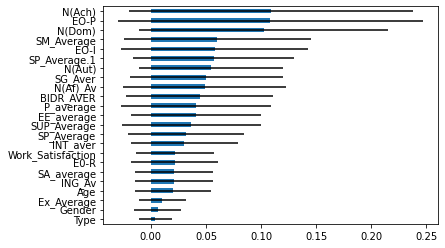

Confusion Matrix (Accuracy 0.9286)

       Prediction
Actual   0   1
     0  73  13
     1   5 161
Confusion Matrix (Accuracy 0.9167)

       Prediction
Actual   0   1
     0  42   8
     1   6 112


In [ ]:
#Random forest with additional dimension
X1 = survey_final.drop(columns=['profit','Founder'])
y1 = survey_final['Founder']
train_X1, valid_X1, train_y1, valid_y1 = train_test_split(X1, y1, test_size=0.4, random_state=111)
rf1 = RandomForestClassifier(n_estimators=500, random_state=1)
rf1.fit(train_X1, train_y1)
# variable (feature) importance plot
importances1 = rf1.feature_importances_
std1 = np.std([tree.feature_importances_ for tree in rf1.estimators_], axis=0)
df1 = pd.DataFrame({'feature': train_X1.columns, 'importance': importances1, 'std': std1})
df1 = df.sort_values('importance')
print(df1)
ax = df1.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')
plt.show()
# confusion matrix for validation set
classificationSummary(train_y1, rf1.predict(train_X1))
# confusion matrix for validation set
classificationSummary(valid_y1, rf1.predict(valid_X1))

In [ ]:
#F1 Score
f1_score(valid_y1, rf1.predict(valid_X1))

0.9411764705882353

**This model will be rejected as it consists of an irrelevant variable (SPECIFY)**

#Linear Regression

In [ ]:
# partition data
survey2 = survey.copy()
excludeColumn2 = 'profit','SPECIFY','Founder'
outcome2 = 'profit'
predictors2 = [s for s in survey2.columns if s not in excludeColumn2]
X_2 = survey2[predictors2]
y_2 = survey2[outcome2]
train_X_2, valid_X_2, train_y_2, valid_y_2 = train_test_split(X_2, y_2, test_size=0.4, random_state=111)
#Modelling
ent_survey1 = LinearRegression()
ent_survey1.fit(train_X_2, train_y_2)
print(ent_survey1)
# print coefficients
print(pd.DataFrame({'Predictor': train_X_2.columns, 'coefficient': ent_survey1.coef_}))
# print performance measures (training data)
regressionSummary(train_y_2, ent_survey1.predict(train_X_2))
# Use predict() to make predictions on a new set
ent_survey_pred1 = ent_survey1.predict(valid_X_2)
result = pd.DataFrame({'Predicted': ent_survey_pred1, 'Actual': valid_y_2,'Residual': valid_y_2 - ent_survey_pred1})
print(result.head(20))
# print performance measures (validation data)
regressionSummary(valid_y_2, ent_survey_pred1)

LinearRegression()
            Predictor  coefficient
0                 Age    -0.079896
1              Gender    -1.596991
2                Type     0.150643
3           P_average     0.229538
4          SA_average    -0.345723
5          SP_Average    -0.566500
6          EE_average    -0.043488
7            N(Af)_Av    -0.235573
8              N(Dom)    -0.134665
9              N(Ach)     0.502066
10             N(Aut)    -0.345254
11               EO-I    -0.166228
12               EO-P    -0.080272
13               E0-R     0.228923
14       SP_Average.1    -0.057835
15        SUP_Average    -0.215116
16         SM_Average    -0.580776
17           INT_aver    -0.088831
18             ING_Av     0.281425
19         Ex_Average    -0.090806
20            SG_Aver     0.007865
21          BIDR_AVER     0.278518
22  Work_Satisfaction     0.559849

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.6478
            Mean Absol

In [ ]:
#R-squared
r2_score(valid_y_2, ent_survey1.predict(valid_X_2))

0.5040457004992345

**Linear regression model is a good fit model, but RMSE value for this model is very high. Moreover, R2 value for this model is only 0.50. In spite of it, this model will be nominated for final model selection**

In [ ]:
#Polynomial Regression
surveyP = survey.copy()
excludeColumnP = 'profit','SPECIFY','Founder'
outcomeP = 'profit'
predictorsP = [s for s in surveyP.columns if s not in excludeColumnP]
X_P = surveyP[predictorsP].to_numpy()
y_P = surveyP[outcomeP].to_numpy()
train_X_P, valid_X_P, train_y_P, valid_y_P = train_test_split(X_P, y_P, test_size=0.4, random_state=111)
#importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=4)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(train_X_P,train_y_P)
poly_pred_P=pipe.predict(valid_X_P)
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(valid_y_P, poly_pred_P))
x_poly, poly_pred_P = zip(*sorted_zip)
from sklearn.metrics import mean_squared_error
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(valid_y_P,poly_pred_P)))
#Training Regression Summary
regressionSummary(train_y_P, pipe.predict(train_X_P))
#regression summary
regressionSummary(valid_y_P, poly_pred_P)
#R-squared
r2_score(valid_y_P, poly_pred_P)

RMSE for Polynomial Regression=> 1.197691057985159

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.0000
            Mean Absolute Error (MAE) : 0.0000
          Mean Percentage Error (MPE) : 0.0000
Mean Absolute Percentage Error (MAPE) : 0.0000

Regression statistics

                      Mean Error (ME) : -0.0016
       Root Mean Squared Error (RMSE) : 1.1977
            Mean Absolute Error (MAE) : 0.8444
          Mean Percentage Error (MPE) : -7.4686
Mean Absolute Percentage Error (MAPE) : 25.3849


-0.9389994385793896

**Polynomial model is the worst model tried for this analysis**

**As linear regression models seem not working, hence, we try to optimise it by adding one additional dimension and employing PCA**

**Linear Regression with SPECIFY COLUMN**

In [ ]:
# Linear Regression with SPECIFY COLUMN
survey_2 = survey_final.copy()
excludeColumn_2 = 'profit','Founder'
outcome_2 = 'profit'
predictors_2 = [s for s in survey_2.columns if s not in excludeColumn_2]
X2 = survey_2[predictors_2]
y2 = survey_2[outcome_2]
train_X2, valid_X2, train_y2, valid_y2 = train_test_split(X2, y2, test_size=0.4, random_state=111)
ent_survey = LinearRegression()
ent_survey.fit(train_X2, train_y2)
print(ent_survey)
# print coefficients
print(pd.DataFrame({'Predictor': X2.columns, 'coefficient': ent_survey.coef_}))
# print performance measures (training data)
regressionSummary(train_y2, ent_survey.predict(train_X2))
# Use predict() to make predictions on a new set
ent_survey_pred = ent_survey.predict(valid_X2)
result = pd.DataFrame({'Predicted': ent_survey_pred, 'Actual': valid_y2,'Residual': valid_y2 - ent_survey_pred})
print(result.head(20))
# print performance measures (validation data)
regressionSummary(valid_y2, ent_survey_pred)

LinearRegression()
                      Predictor  coefficient
0                           Age    -0.119990
1                        Gender    -4.241608
2                          Type     0.225539
3                     P_average     1.658503
4                    SA_average    -0.895778
5                    SP_Average     0.725388
6                    EE_average     1.019981
7                      N(Af)_Av    -0.082076
8                        N(Dom)     0.012175
9                        N(Ach)    -0.802919
10                       N(Aut)    -0.015111
11                         EO-I    -3.090905
12                         EO-P     0.732434
13                         E0-R    -0.575485
14                 SP_Average.1    -0.000556
15                  SUP_Average     0.000484
16                   SM_Average     0.000193
17                     INT_aver    -0.000170
18                       ING_Av    -0.000005
19                   Ex_Average    -0.000343
20                      SG_Aver    -

**This model seems good, but it has an irrelevant variable (SPECIFY). Hence, we will not consider it**

**Linear Regression with PCA**

In [ ]:
#PCA
pca = PCA(0.97)
X_pca = pca.fit_transform(X_2)
print(X_pca.shape)
print('Explained_variance_ratio',pca.explained_variance_ratio_)

(420, 15)
Explained_variance_ratio [0.21687783 0.14524135 0.13329268 0.10999053 0.08150229 0.05952548
 0.04689882 0.0388061  0.03446184 0.0275138  0.02139631 0.01685978
 0.01572471 0.01311585 0.01005897]


In [ ]:
#Linear Regression with PCA
train_X_pca, valid_X_pca, train_y_2, valid_y_2 = train_test_split(X_pca, y_2, test_size=0.4, random_state=111)
ent_survey_pca = LinearRegression()
ent_survey_pca.fit(train_X_pca, train_y_2)
print(ent_survey_pca)
# print coefficients
print(pd.DataFrame({ 'coefficient': ent_survey.coef_}))
# print performance measures (training data)
regressionSummary(train_y_2, ent_survey_pca.predict(train_X_pca))
# Use predict() to make predictions on a new set
ent_survey_pred_pca = ent_survey_pca.predict(valid_X_pca)
result = pd.DataFrame({'Predicted': ent_survey_pred_pca, 'Actual': valid_y_2,'Residual': valid_y_2 - ent_survey_pred_pca})
print(result.head(20))
# print performance measures (validation data)
regressionSummary(valid_y_2, ent_survey_pred_pca)

LinearRegression()
    coefficient
0     -0.119990
1     -4.241608
2      0.225539
3      1.658503
4     -0.895778
5      0.725388
6      1.019981
7     -0.082076
8      0.012175
9     -0.802919
10    -0.015111
11    -3.090905
12     0.732434
13    -0.575485
14    -0.000556
15     0.000484
16     0.000193
17    -0.000170
18    -0.000005
19    -0.000343
20    -0.000581
21     0.000039
22     1.645512
23     1.744711
24    -0.160610
25     2.456581
26     2.310428
27     0.382519
28     0.860070
29    -3.083926
30    -2.002439
31    -3.760093
32     4.710658
33     0.702706
34    -1.291513
35     0.845840
36     0.711723
37    -2.034746
38     3.171577
39     1.316321
40     1.137884
41    -4.410319
42     1.173555
43    -4.780925

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.7517
            Mean Absolute Error (MAE) : 0.5912
          Mean Percentage Error (MPE) : -7.9083
Mean Absolute Percentage Error (MAPE) : 20.8946


In [ ]:
#R2 Score
r2_score(valid_y_2, ent_survey_pred_pca)

0.4135082172435782

**As R2 value for this model is very low, hence, we are not satisfied with model.**

#Logistic Regression

SMOTE: SMOTE stands for Synthetic Minority Oversampling Technique. This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that we supply as input.

In [ ]:
survey_3 = survey_final.drop(columns=['profit'])
X3 = survey_3.loc[:, survey_3.columns != 'Founder']
y3 = survey_3.loc[:, survey_3.columns == 'Founder']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X3_train, X3_valid, y3_train, y3_valid = train_test_split(X3, y3, test_size=0.4, random_state=111)
columns = X3_train.columns
os_data_X,os_data_y=os.fit_resample(X3_train, y3_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y, columns=['Founder'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of non founder in oversampled data",len(os_data_y[os_data_y['Founder']==0]))
print("Number of founder",len(os_data_y[os_data_y['Founder']==1]))
print("Proportion of no founder data in oversampled data is ",len(os_data_y[os_data_y['Founder']==0])/len(os_data_X))
print("Proportion of founder data in oversampled data is ",len(os_data_y[os_data_y['Founder']==1])/len(os_data_X))

length of oversampled data is  332
Number of non founder in oversampled data 166
Number of founder 166
Proportion of no founder data in oversampled data is  0.5
Proportion of founder data in oversampled data is  0.5


Recursive Feature elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=500)
rfe = RFE(logreg)
rfe = rfe.fit(os_data_X,os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False  True False  True False  True  True False  True
  True False False False  True False False False  True False  True False
 False  True False False  True  True False  True False False  True  True
  True  True  True  True False False  True False]
[ 1  1 12 14  1  9  1 18  1  1  4  1  1 19  6 10  1 13  7 15  1  2  1 21
 20  1 16 17  1  1 22  1  8  5  1  1  1  1  1  1  3 23  1 11]


In [ ]:
os_data_X.columns

Index(['Age', 'Gender', 'Type', 'P_average', 'SA_average', 'SP_Average',
       'EE_average', 'N(Af)_Av', 'N(Dom)', 'N(Ach)', 'N(Aut)', 'EO-I', 'EO-P',
       'E0-R', 'SP_Average.1', 'SUP_Average', 'SM_Average', 'INT_aver',
       'ING_Av', 'Ex_Average', 'SG_Aver', 'BIDR_AVER', 'Work_Satisfaction',
       'SPECIFY_AUTOMOBILE', 'SPECIFY_BRAND BUILDING', 'SPECIFY_CARRIAGES',
       'SPECIFY_DATA PROCESSNG', 'SPECIFY_FABRICS', 'SPECIFY_FOOD ',
       'SPECIFY_FORESTRY', 'SPECIFY_FURNITURE', 'SPECIFY_HEALTH',
       'SPECIFY_LEATHER', 'SPECIFY_MACHINERY', 'SPECIFY_METAL',
       'SPECIFY_PAINT', 'SPECIFY_PIPES', 'SPECIFY_PLASTICS',
       'SPECIFY_POWER CONTROL EQUI`', 'SPECIFY_RUBBER', 'SPECIFY_SPORTS',
       'SPECIFY_SYNTHETIC FIBRE', 'SPECIFY_TEXTILES', 'SPECIFY_TYRE'],
      dtype='object')

In [ ]:
col = ['Age', 'Gender', 'SA_average','EE_average','N(Dom)', 'N(Ach)','EO-I','EO-P','SM_Average', 'SG_Aver','Work_Satisfaction',
       'SPECIFY_CARRIAGES','SPECIFY_FOOD ','SPECIFY_FORESTRY','SPECIFY_HEALTH',
       'SPECIFY_METAL','SPECIFY_PAINT', 'SPECIFY_PIPES','SPECIFY_PLASTICS','SPECIFY_POWER CONTROL EQUI`','SPECIFY_RUBBER', 'SPECIFY_TEXTILES']
X=os_data_X[col]
y=os_data_y['Founder']

Implement the model

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit(maxiter=500,method='lbfgs')
print(result.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                   Results: Logit
Model:                     Logit                  Pseudo R-squared:       0.721     
Dependent Variable:        Founder                AIC:                    172.2359  
Date:                      2021-12-11 00:36       BIC:                    255.9489  
No. Observations:          332                    Log-Likelihood:         -64.118   
Df Model:                  21                     LL-Null:                -230.12   
Df Residuals:              310                    LLR p-value:            9.2556e-58
Converged:                 1.0000                 Scale:                  1.0000    
No. Iterations:            440.0000                                                 
------------------------------------------------------------------------------------
                             Coef.    Std.Err.    z    P>|z|     [0.025     0.975]  
------------------------------------------------------------------------------------
Age            

The p-values for most of the variables are larger than 0.05, therefore, we will remove them. 

In [ ]:
cols = ['Age', 'Gender','SA_average','EE_average', 'N(Dom)','EO-I', 'EO-P','SM_Average', 'SPECIFY_PLASTICS']
X_R=os_data_X[cols]
y_R=os_data_y['Founder']
logit_model=sm.Logit(y_R,X_R)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.311433
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.551     
Dependent Variable: Founder          AIC:              224.7914  
Date:               2021-12-11 00:36 BIC:              259.0376  
No. Observations:   332              Log-Likelihood:   -103.40   
Df Model:           8                LL-Null:          -230.12   
Df Residuals:       323              LLR p-value:      3.1844e-50
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------
Age               0.6885   0.1360  5.0642 0.0000   0.4220  0.9549
Gender           -4.2018   0.6867 -6.1187 0.0000  -5.5478 -2.8559


In [ ]:
cols2 = ['Age', 'Gender','SA_average','EE_average', 'N(Dom)','SM_Average', 'SPECIFY_PLASTICS']
X_R1=os_data_X[cols2]
y_R1=os_data_y['Founder']
logit_model=sm.Logit(y_R1,X_R1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.312303
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.549     
Dependent Variable: Founder          AIC:              221.3691  
Date:               2021-12-11 00:36 BIC:              248.0051  
No. Observations:   332              Log-Likelihood:   -103.68   
Df Model:           6                LL-Null:          -230.12   
Df Residuals:       325              LLR p-value:      9.9378e-52
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------
Age               0.7078   0.1338  5.2900 0.0000   0.4455  0.9700
Gender           -3.9442   0.5693 -6.9284 0.0000  -5.0599 -2.8284


In [ ]:
train_X_R1, valid_X_R1, train_y_R1, valid_y_R1 = train_test_split(X_R1, y_R1, test_size=0.3, random_state=0)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X_R1, train_y_R1)

LogisticRegression(C=1e+42, solver='liblinear')

In [ ]:
logit_reg_pred = logit_reg.predict(valid_X_R1)
logit_reg_proba = logit_reg.predict_proba(valid_X_R1)
logit_result = pd.DataFrame({'actual': valid_y_R1,
'p(0)': [p[0] for p in logit_reg_proba],
'p(1)': [p[1] for p in logit_reg_proba],
'predicted': logit_reg_pred })
# display
print(logit_result)

     actual      p(0)      p(1)  predicted
52        0  0.844107  0.155893          0
56        1  0.000149  0.999851          1
55        1  0.076914  0.923086          1
191       1  0.760442  0.239558          0
145       1  0.267947  0.732053          1
..      ...       ...       ...        ...
214       1  0.032407  0.967593          1
100       1  0.262366  0.737634          1
212       1  0.033278  0.966722          1
90        1  0.062728  0.937272          1
120       1  0.033278  0.966722          1

[100 rows x 4 columns]


In [ ]:
#training confusion matrix
classificationSummary(train_y_R1, logit_reg.predict(train_X_R1))
# validation confusion matrix
classificationSummary(valid_y_R1, logit_reg.predict(valid_X_R1))

Confusion Matrix (Accuracy 0.8491)

       Prediction
Actual  0  1
     0 98 21
     1 14 99
Confusion Matrix (Accuracy 0.8200)

       Prediction
Actual  0  1
     0 35 12
     1  6 47


In [ ]:
#F1 Score
f1_score(valid_y_R1, logit_reg.predict(valid_X_R1))

0.8392857142857143

In [ ]:
#Confusion matrix
from sklearn.metrics import  confusion_matrix
cm_l = confusion_matrix(valid_y_R1, logit_reg_pred)
print("Confusion matrix:")
print(cm_l)
tn_l = cm_l[0][0]
fp_l = cm_l[0][1]
fn_l = cm_l[1][0]
tp_l = cm_l[1][1]
print("Total number of true positives", tp_l)
print("Total number of false negatives",fn_l)
print("Total number of false positives",fp_l)
print("Total number of true negatives",tn_l)
acc_l=float(tp_l+tn_l)/(tp_l+tn_l+fp_l+fn_l)
print('Classifier Accuracy: %.2f%%' % (acc_l * 100))
tpr_l = float(tp_l)/(tp_l+fn_l)
print('True Positive Rate (TPR/Recall/Sensitivity): %.2f%%' % (tpr_l * 100))
specificity_l = float (tn_l)/(tn_l+fp_l)
print ("True Negative Rate (TNR/Specificity/selectivity):%.2f%%" % (specificity_l*100)) 
fpr_l = float(fp_l)/(fp_l+tn_l)
print("False Positive Rate (FPR): %.2f%%" % (fpr_l * 100))
fnr_l = fn_l/ (fn_l+ tp_l)
print("False Negative Rate (FNR): %.2f%%" % (fnr_l*100))
precision_l=float(tp_l)/(tp_l+fp_l)
print("Precision/Positive Predictive value:%.2f%%" %(precision_l*100))
fScore_l = 2*((precision_l*tpr_l)/(precision_l+tpr_l))
print("F1-Score: %.2f%%" %(fScore_l*100))

Confusion matrix:
[[35 12]
 [ 6 47]]
Total number of true positives 47
Total number of false negatives 6
Total number of false positives 12
Total number of true negatives 35
Classifier Accuracy: 82.00%
True Positive Rate (TPR/Recall/Sensitivity): 88.68%
True Negative Rate (TNR/Specificity/selectivity):74.47%
False Positive Rate (FPR): 25.53%
False Negative Rate (FNR): 11.32%
Precision/Positive Predictive value:79.66%
F1-Score: 83.93%


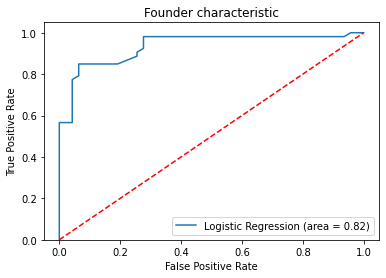

In [ ]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(valid_y_R1, logit_reg_pred)
fpr, tpr, thresholds = roc_curve(valid_y_R1, logit_reg_proba[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim()
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Founder characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

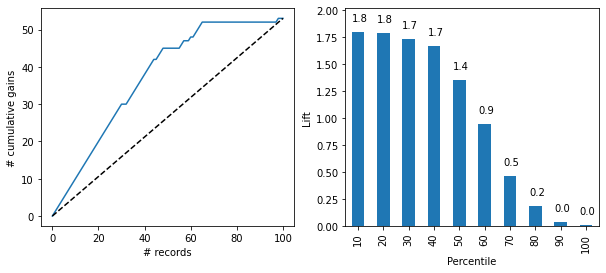

In [ ]:
#Cumulative gain and Lift
df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
plt.show()

***This model is slightly overfitted as training accauracy is greater than the validation. Moreover, we later realised that variable SPECIFY is not relevant for this analysis. Hence, this model will be rejected**

Without SPECIFY

In [ ]:
survey_l3 = survey.drop(columns=['profit','SPECIFY','Type'])
X_l3 = survey_l3.loc[:, survey_l3.columns != 'Founder']
y_l3 = survey_l3.loc[:, survey_l3.columns == 'Founder']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_l3_train, X_l3_valid, y_l3_train, y_l3_valid = train_test_split(X_l3, y_l3, test_size=0.4, random_state=111)
columns = X_l3_train.columns
os_data_lX,os_data_ly=os.fit_resample(X_l3_train, y_l3_train)
os_data_lX = pd.DataFrame(data=os_data_lX,columns=columns )
os_data_ly= pd.DataFrame(data=os_data_ly, columns=['Founder'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_lX))
print("Number of non founder in oversampled data",len(os_data_ly[os_data_ly['Founder']==0]))
print("Number of founder",len(os_data_ly[os_data_ly['Founder']==1]))
print("Proportion of no founder data in oversampled data is ",len(os_data_ly[os_data_ly['Founder']==0])/len(os_data_lX))
print("Proportion of founder data in oversampled data is ",len(os_data_ly[os_data_ly['Founder']==1])/len(os_data_lX))

length of oversampled data is  332
Number of non founder in oversampled data 166
Number of founder 166
Proportion of no founder data in oversampled data is  0.5
Proportion of founder data in oversampled data is  0.5


In [ ]:
from sklearn.feature_selection import RFE
data_final_vars1=survey_l3.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars1 if i not in y]
logreg1 = LogisticRegression(max_iter=500)
rfe1 = RFE(logreg1)
rfe1 = rfe1.fit(os_data_lX,os_data_ly.values.ravel())
print(rfe1.support_)
print(rfe1.ranking_)

[ True  True False  True False  True False  True  True  True  True  True
 False False False  True False False False  True False False]
[ 1  1  9  1  6  1  8  1  1  1  1  1 12  3  5  1 10  4 11  1  2  7]


In [ ]:
os_data_lX.columns

Index(['Age', 'Gender', 'P_average', 'SA_average', 'SP_Average', 'EE_average',
       'N(Af)_Av', 'N(Dom)', 'N(Ach)', 'N(Aut)', 'EO-I', 'EO-P', 'E0-R',
       'SP_Average.1', 'SUP_Average', 'SM_Average', 'INT_aver', 'ING_Av',
       'Ex_Average', 'SG_Aver', 'BIDR_AVER', 'Work_Satisfaction'],
      dtype='object')

In [ ]:
col_ls=['Age','Gender','SA_average','EE_average','N(Dom)','N(Ach)', 'N(Aut)','EO-I','EO-P','SM_Average', 'SG_Aver']
X_Z=os_data_lX[col_ls]
y_Z=os_data_ly['Founder']
logit_model=sm.Logit(y_Z,X_Z)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.336389
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.515     
Dependent Variable: Founder          AIC:              245.3620  
Date:               2021-12-11 00:38 BIC:              287.2185  
No. Observations:   332              Log-Likelihood:   -111.68   
Df Model:           10               LL-Null:          -230.12   
Df Residuals:       321              LLR p-value:      3.0840e-45
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age            0.6433    0.1292   4.9776  0.0000   0.3900   0.8966
Gender        -3.3756    0.6424  -5.2547  0.0000  -4.6347  -2.

In [ ]:
cols_final = ['Age','Gender','SA_average','EE_average','N(Dom)', 'N(Aut)','EO-P','SM_Average', 'SG_Aver']
X_final=os_data_lX[cols_final]
y_final=os_data_ly['Founder']
logit_model=sm.Logit(y_final,X_final)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.336753
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.514     
Dependent Variable: Founder          AIC:              241.6041  
Date:               2021-12-11 00:38 BIC:              275.8503  
No. Observations:   332              Log-Likelihood:   -111.80   
Df Model:           8                LL-Null:          -230.12   
Df Residuals:       323              LLR p-value:      1.1619e-46
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age            0.6354    0.1284   4.9498  0.0000   0.3838   0.8871
Gender        -3.3814    0.5594  -6.0445  0.0000  -4.4779  -2.

In [ ]:
#Claculating Odd ratios from the coef.
import math
print("Age_odd_ratios:",  math.exp(0.6354))
print("Gender_odd_ratios:", math.exp(-3.3814))
print("SA_average_odd_ratios:", math.exp(-3.3203))
print("EE_average_odd_ratios:", math.exp(1.2488))
print("N(Dom)_odd_ratios:", math.exp(3.1860))
print("N(Aut)_odd_ratios:", math.exp(-0.9288))
print("EO-P_odd_ratios:", math.exp(-1.2853))
print("SM_average_odd_ratios:", math.exp(1.2908))
print("SG_Aver_odd_ratios:", math.exp(1.1119))

Age_odd_ratios: 1.8877771012972229
Gender_odd_ratios: 0.03399982164891095
SA_average_odd_ratios: 0.03614198753123496
EE_average_odd_ratios: 3.486157057954899
N(Dom)_odd_ratios: 24.191467781924032
N(Aut)_odd_ratios: 0.3950274590163841
EO-P_odd_ratios: 0.27656760090491517
SM_average_odd_ratios: 3.6356939477991688
SG_Aver_odd_ratios: 3.0401291558724313


In [ ]:
#Fit logistic regression model
train_X_final, valid_X_final, train_y_final, valid_y_final = train_test_split(X_final, y_final, test_size=0.4, random_state=111)
logit_reg_final = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
result_final = logit_reg_final.fit(train_X_final, train_y_final)

In [ ]:
#Make prediction and find probability
logit_reg_pred_final = logit_reg_final.predict(valid_X_final)
logit_reg_proba_final = logit_reg_final.predict_proba(valid_X_final)
logit_result_final = pd.DataFrame({'actual': valid_y_final,
'p(0)': [p[0] for p in logit_reg_proba_final],
'p(1)': [p[1] for p in logit_reg_proba_final],
'predicted': logit_reg_pred_final})
print(logit_result_final)

     actual      p(0)      p(1)  predicted
145       1  0.129878  0.870122          1
15        1  0.028506  0.971494          1
279       0  0.988001  0.011999          0
146       0  0.995305  0.004695          0
133       1  0.829811  0.170189          0
..      ...       ...       ...        ...
44        1  0.000600  0.999400          1
151       1  0.000600  0.999400          1
225       0  0.998999  0.001001          0
211       0  0.522404  0.477596          0
140       0  0.979275  0.020725          0

[133 rows x 4 columns]


In [ ]:
#training confusion matrix
classificationSummary(train_y_final, logit_reg_final.predict(train_X_final))
# validation confusion matrix
classificationSummary(valid_y_final, logit_reg_final.predict(valid_X_final))

Confusion Matrix (Accuracy 0.8744)

       Prediction
Actual  0  1
     0 93 13
     1 12 81
Confusion Matrix (Accuracy 0.8722)

       Prediction
Actual  0  1
     0 58  2
     1 15 58


In [ ]:
#Accuracy, Precision, Recall, F1 Score
from sklearn.metrics import precision_score, recall_score, f1_score
print("Accuracy:",metrics.accuracy_score(valid_y_final, logit_reg_final.predict(valid_X_final)))
print("Precision:",metrics.precision_score(valid_y_final, logit_reg_final.predict(valid_X_final), average="binary"))
print("Recall:",metrics.recall_score(valid_y_final, logit_reg_final.predict(valid_X_final), average="binary"))
print("F1 Score:",metrics.f1_score(valid_y_final, logit_reg_final.predict(valid_X_final), average="binary"))

Accuracy: 0.8721804511278195
Precision: 0.9666666666666667
Recall: 0.7945205479452054
F1 Score: 0.8721804511278196


In [ ]:
#Confusion matrix, True Positive Rate, False Positive Rate, False Positive Rate and False Negative Rate
from sklearn.metrics import  confusion_matrix
cm_logit = confusion_matrix(valid_y_final, logit_reg_final.predict(valid_X_final))
print("Confusion matrix:")
print(cm_logit)
tn_lg = cm_logit[0][0]
fp_lg = cm_logit[0][1]
fn_lg = cm_logit[1][0]
tp_lg = cm_logit[1][1]
print("Total number of true positives", tp_lg)
print("Total number of false negatives",fn_lg)
print("Total number of false positives",fp_lg)
print("Total number of true negatives",tn_lg)
acc_lg=float(tp_lg+tn_lg)/(tp_lg+tn_lg+fp_lg+fn_lg)
print('Classifier Accuracy: %.2f%%' % (acc_lg * 100))
tpr_lg = float(tp_lg)/(tp_lg+fn_lg)
print('True Positive Rate (TPR/Recall/Sensitivity): %.2f%%' % (tpr_lg * 100))
specificity_lg = float (tn_lg)/(tn_lg+fp_lg)
print ("True Negative Rate (TNR/Specificity/selectivity):%.2f%%" % (specificity_lg*100)) 
fpr_lg = float(fp_lg)/(fp_lg+tn_lg)
print("False Positive Rate (FPR): %.2f%%" % (fpr_lg * 100))
fnr_lg = fn_lg/ (fn_lg+ tp_lg)
print("False Negative Rate (FNR): %.2f%%" % (fnr_lg*100))
precision_lg=float(tp_lg)/(tp_lg+fp_lg)
print("Precision/Positive Predictive value:%.2f%%" %(precision_lg*100))
fScore_lg = 2*((precision_lg*tpr_lg)/(precision_lg+tpr_lg))
print("F1-Score: %.2f%%" %(fScore_lg*100))

Confusion matrix:
[[58  2]
 [15 58]]
Total number of true positives 58
Total number of false negatives 15
Total number of false positives 2
Total number of true negatives 58
Classifier Accuracy: 87.22%
True Positive Rate (TPR/Recall/Sensitivity): 79.45%
True Negative Rate (TNR/Specificity/selectivity):96.67%
False Positive Rate (FPR): 3.33%
False Negative Rate (FNR): 20.55%
Precision/Positive Predictive value:96.67%
F1-Score: 87.22%


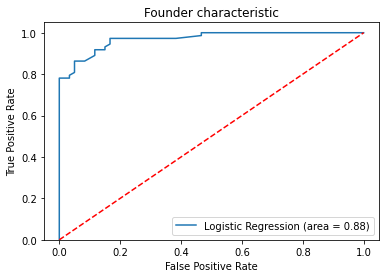

In [ ]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc1 = roc_auc_score(valid_y_final, logit_reg_final.predict(valid_X_final))
fpr_lg, tpr_lg, thresholds = roc_curve(valid_y_final, logit_reg_final.predict_proba(valid_X_final)[:,1])
plt.figure()
plt.plot(fpr_lg, tpr_lg, label='Logistic Regression (area = %0.2f)' % logit_roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim()
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Founder characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC1')
plt.show()

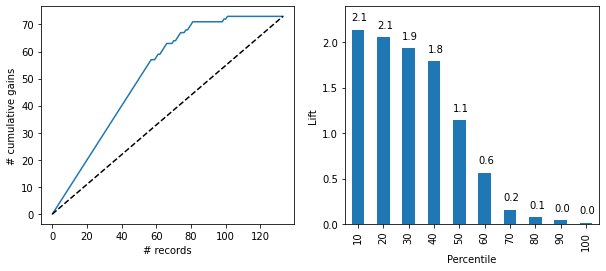

In [ ]:
#Cumulative gains and Lift chart
df_final = logit_result_final.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df_final.actual, ax=axes[0])
liftChart(df_final['p(1)'], title=False, ax=axes[1])
plt.show()

**Logistic Regression is a good classifier model with high F1 score and True value rate. Hence, we will nominate it for final model selection. Most likely this model will be selected for this dataset analysis**.

**Mean value of selected variables**

In [ ]:
Logistic_result = survey[{'Age','Gender','SA_average','EE_average','N(Dom)', 'N(Aut)','EO-P','SM_Average', 'SG_Aver','Founder'}]
Standard = Logistic_result.groupby('Founder').mean()
print(Standard)
Standard.to_excel("output.xlsx") 

           Gender    N(Dom)    N(Aut)  ...  SA_average      EO-P  EE_average
Founder                                ...                                  
0        1.242647  3.801164  3.579963  ...    3.476103  3.646008    1.242647
1        1.095070  4.373582  4.024032  ...    3.384683  4.018612    1.841549

[2 rows x 9 columns]


**Industry-wise mean value of selected variables**

In [ ]:
Logistic_result1 = survey[{'Age','Gender','SA_average','EE_average','N(Dom)', 'N(Aut)','EO-P','SM_Average', 'SG_Aver','SPECIFY'}]
industrial_standard = Logistic_result1.groupby('SPECIFY').mean()
print(industrial_standard)
industrial_standard.to_excel("output2.xlsx")

                     Gender    N(Dom)  ...      EO-P  EE_average
SPECIFY                                ...                      
AUTOMOBILE              1.0  4.435185  ...  4.428571    1.000000
BRAND BUILDING          1.0  3.386574  ...  4.142857    2.000000
CARRIAGES               2.0  3.858796  ...  3.714286    1.333333
DATA PROCESSNG          2.0  3.263889  ...  3.142857    1.666667
FABRICS                 1.0  3.122685  ...  3.571429    1.666667
FOOD                    1.2  3.866204  ...  3.828571    1.600000
FORESTRY                1.0  4.000000  ...  3.714286    3.000000
FURNITURE               1.0  3.754630  ...  4.714286    2.666667
HEALTH                  1.5  4.113426  ...  3.642857    1.833333
LEATHER                 1.0  2.631944  ...  3.571429    1.666667
MACHINERY               1.0  5.000000  ...  3.857143    0.000000
METAL                   1.0  4.271991  ...  3.785714    0.944444
PAINT                   1.0  4.509259  ...  4.714286    0.333333
PIPES                   1

#Neural Network

In [ ]:
#Neural Network (MLPClassifier) with 2 hidden layer
NN1_data = survey.copy()
excludeColumn1_NN = 'profit','Founder','SPECIFY','Type'
outcome1_NN = 'Founder'
predictors1_NN = [s for s in NN1_data.columns if s not in excludeColumn1_NN]
X1NN = NN1_data[predictors1_NN]
y1NN = NN1_data[outcome1_NN]
train_X1NN, valid_X1NN, train_y1NN, valid_y1NN = train_test_split(X1NN, y1NN, test_size=0.4, random_state=111)
clf1 = MLPClassifier(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', random_state=1,max_iter=500)
clf1.fit(train_X1NN, train_y1NN.values)
# training performance
classificationSummary(train_y1NN, clf1.predict(train_X1NN))
# validation performance
classificationSummary(valid_y1NN, clf1.predict(valid_X1NN))

Confusion Matrix (Accuracy 0.7579)

       Prediction
Actual   0   1
     0  79   7
     1  54 112
Confusion Matrix (Accuracy 0.7857)

       Prediction
Actual  0  1
     0 49  1
     1 35 83


In [ ]:
f1_score(valid_y1NN, clf1.predict(valid_X1NN))

0.8217821782178218

***This model is underfitted as training accuracy is lower than the validation ***

In [ ]:
#Neural Network (MLPClassifier) with 3 hidden layers
NN1_data = survey.copy()
excludeColumn1_NN = 'profit','Founder','SPECIFY'
outcome1_NN = 'Founder'
predictors1_NN = [s for s in NN1_data.columns if s not in excludeColumn1_NN]
X1NN = NN1_data[predictors1_NN]
y1NN = NN1_data[outcome1_NN]
train_X1NN, valid_X1NN, train_y1NN, valid_y1NN = train_test_split(X1NN, y1NN, test_size=0.4, random_state=111)
clf1 = MLPClassifier(hidden_layer_sizes=(3), activation='logistic', solver='lbfgs', random_state=1,max_iter=1000)
clf1.fit(train_X1NN, train_y1NN.values)
# training performance (use idxmax to revert the one-hotencoding)
classificationSummary(train_y1NN, clf1.predict(train_X1NN))
# validation performance
classificationSummary(valid_y1NN, clf1.predict(valid_X1NN))

Confusion Matrix (Accuracy 0.9048)

       Prediction
Actual   0   1
     0  70  16
     1   8 158
Confusion Matrix (Accuracy 0.8750)

       Prediction
Actual   0   1
     0  36  14
     1   7 111


In [ ]:
#F1 Score
f1_score(valid_y1NN, clf1.predict(valid_X1NN))

0.9135802469135803

**This model is underfitted because training accuracy is higher than the validation**

In [ ]:
#Try new activation and solver
clf1 = MLPClassifier(hidden_layer_sizes=(3), activation='relu', solver='adam', random_state=1,max_iter=2000)
clf1.fit(train_X1NN, train_y1NN.values)
# training performance (use idxmax to revert the one-hotencoding)
classificationSummary(train_y1NN, clf1.predict(train_X1NN))
# validation performance
classificationSummary(valid_y1NN, clf1.predict(valid_X1NN))

Confusion Matrix (Accuracy 0.8810)

       Prediction
Actual   0   1
     0  69  17
     1  13 153
Confusion Matrix (Accuracy 0.8750)

       Prediction
Actual   0   1
     0  39  11
     1  10 108


In [ ]:
#F1 Score
f1_score(valid_y1NN, clf1.predict(valid_X1NN))

0.9113924050632911

***This model is overfitted as training accuracy is slightly higher than the validation*** 

In [ ]:
#Neural Network (MLP Classifier) with additional dimension
NN_data = survey_final.copy()
excludeColumn_NN = 'profit','Founder'
outcome_NN = 'Founder'
predictors_NN = [s for s in NN_data.columns if s not in excludeColumn_NN]
XNN = NN_data[predictors_NN]
yNN = NN_data[outcome_NN]
train_XNN, valid_XNN, train_yNN, valid_yNN = train_test_split(XNN, yNN, test_size=0.4, random_state=111)
clf = MLPClassifier(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', random_state=1,max_iter=500)
clf.fit(train_XNN, train_yNN.values)
# training performance 
classificationSummary(train_yNN, clf.predict(train_XNN))
# validation performance
classificationSummary(valid_yNN, clf.predict(valid_XNN))

Confusion Matrix (Accuracy 0.8968)

       Prediction
Actual   0   1
     0  69  17
     1   9 157
Confusion Matrix (Accuracy 0.9048)

       Prediction
Actual   0   1
     0  40  10
     1   6 112


**This model has been dropped as we have found that SPECIFY column is not relevant to the project objective**

In [ ]:
#Neural Network (MLP Classifier) with 3 hidden layer and additional dimension
NN_data = survey_final.copy()
excludeColumn_NN = 'profit','Founder'
outcome_NN = 'Founder'
predictors_NN = [s for s in NN_data.columns if s not in excludeColumn_NN]
XNN = NN_data[predictors_NN]
yNN = NN_data[outcome_NN]
train_XNN, valid_XNN, train_yNN, valid_yNN = train_test_split(XNN, yNN, test_size=0.4, random_state=111)
clf = MLPClassifier(hidden_layer_sizes=(3), activation='logistic', solver='lbfgs', random_state=1,max_iter=500)
clf.fit(train_XNN, train_yNN.values)
# training performance 
classificationSummary(train_yNN, clf.predict(train_XNN))
# validation performance
classificationSummary(valid_yNN, clf.predict(valid_XNN))

Confusion Matrix (Accuracy 0.9008)

       Prediction
Actual   0   1
     0  69  17
     1   8 158
Confusion Matrix (Accuracy 0.8988)

       Prediction
Actual   0   1
     0  39  11
     1   6 112


**This model is good fit, but we will not consider this model because it consist of irrelevant variable (SPECIFY)**

In [ ]:
#Try new activation and solver
clf = MLPClassifier(hidden_layer_sizes=(2), activation='relu', solver='adam', random_state=1,max_iter=2000)
clf.fit(train_XNN, train_yNN.values)
# training performance
classificationSummary(train_yNN, clf.predict(train_XNN))
# validation performance
classificationSummary(valid_yNN, clf.predict(valid_XNN))

Confusion Matrix (Accuracy 0.9127)

       Prediction
Actual   0   1
     0  75  11
     1  11 155
Confusion Matrix (Accuracy 0.9286)

       Prediction
Actual   0   1
     0  45   5
     1   7 111


***This model is underfitted as training accuracy is lower than the validation***

In [ ]:
#Neural Network (MLP classifier using logistic variables)
LNN_data2= survey.loc[:,{'Age','Gender','SA_average','EE_average','N(Dom)', 'N(Aut)','EO-P','SM_Average', 'SG_Aver','Founder'}]
outcome_LNN2 = 'Founder'
predictors_LNN2 = [s for s in LNN_data2.columns if s not in outcome_LNN2]
LXNN2 = LNN_data2[predictors_LNN2]
LyNN2 = LNN_data2[outcome_LNN2]
train_LXNN2, valid_LXNN2, train_LyNN2, valid_LyNN2 = train_test_split(LXNN2, LyNN2, test_size=0.4, random_state=111)
clf_L2 = MLPClassifier(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', random_state=1,max_iter=500)
clf_L2.fit(train_LXNN2, train_LyNN2.values)
# training performance
classificationSummary(train_LyNN2, clf_L2.predict(train_LXNN2))
# validation performance
classificationSummary(valid_LyNN2, clf_L2.predict(valid_LXNN2))

Confusion Matrix (Accuracy 0.7540)

       Prediction
Actual   0   1
     0  83   3
     1  59 107
Confusion Matrix (Accuracy 0.7560)

       Prediction
Actual  0  1
     0 46  4
     1 37 81


In [ ]:
#F1 Score
f1_score(valid_LyNN2, clf_L2.predict(valid_LXNN2))

0.7980295566502463

**This model is good fit and will be considered for final model selection**

In [ ]:
#NN with logistic regression variable
LNN_data2R= survey.loc[:,{'Age','Gender','SA_average','EE_average','N(Dom)', 'N(Aut)','EO-P','SM_Average', 'SG_Aver','profit'}]
outcome_LNN2R = 'profit'
predictors_LNN2R = [s for s in LNN_data2R.columns if s not in outcome_LNN2R]
LXNN2R = LNN_data2R[predictors_LNN2R]
LyNN2R = LNN_data2R[outcome_LNN2R]
train_LXNN2R, valid_LXNN2R, train_LyNN2R, valid_LyNN2R = train_test_split(LXNN2R, LyNN2R, test_size=0.4, random_state=111)
clf_L2R = MLPRegressor(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', random_state=1,max_iter=500)
clf_L2R.fit(train_LXNN2R, train_LyNN2R.values)
# training performance
regressionSummary(train_LyNN2R, clf_L2R.predict(train_LXNN2R))
# validation performance
regressionSummary(valid_LyNN2R, clf_L2R.predict(valid_LXNN2R))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.6434
            Mean Absolute Error (MAE) : 0.5201
          Mean Percentage Error (MPE) : -3.1178
Mean Absolute Percentage Error (MAPE) : 13.8857

Regression statistics

                      Mean Error (ME) : 0.1060
       Root Mean Squared Error (RMSE) : 0.6027
            Mean Absolute Error (MAE) : 0.5351
          Mean Percentage Error (MPE) : 0.4688
Mean Absolute Percentage Error (MAPE) : 12.8938


In [ ]:
#R2 Score
r2_score(valid_LyNN2R, clf_L2R.predict(valid_LXNN2R))

0.5089503779567683

***This model is good fitted to this analysis. Hence, it will be considered for final model selection***

Neural Network Regressor (MLP Regressor)

In [ ]:
#Neural Network Regressor (MLP Regressor)
LNN_dataR= survey.copy()
excludecolumnLLR = 'profit','SPECIFY','Founder'
outcome_LNNR = 'profit'
predictors_LNNR = [s for s in LNN_dataR.columns if s not in excludecolumnLLR]
LXNNR = LNN_dataR[predictors_LNNR]
LyNNR = LNN_dataR[outcome_LNNR]
train_LXNNR, valid_LXNNR, train_LyNNR, valid_LyNNR = train_test_split(LXNNR, LyNNR, test_size=0.4, random_state=111)
clf_LR = MLPRegressor(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', random_state=1,max_iter=500)
clf_LR.fit(train_LXNNR, train_LyNNR.values)
# training performance
regressionSummary(train_LyNNR, clf_LR.predict(train_LXNNR))
# validation performance
regressionSummary(valid_LyNNR, clf_LR.predict(valid_LXNNR))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1.0568
            Mean Absolute Error (MAE) : 0.7483
          Mean Percentage Error (MPE) : -15.3241
Mean Absolute Percentage Error (MAPE) : 30.2906

Regression statistics

                      Mean Error (ME) : 0.2381
       Root Mean Squared Error (RMSE) : 0.8925
            Mean Absolute Error (MAE) : 0.6803
          Mean Percentage Error (MPE) : -1.6715
Mean Absolute Percentage Error (MAPE) : 20.0395


In [ ]:
#R2 Score
r2_score(valid_LyNNR, clf_LR.predict(valid_LXNNR))

-0.07665071206459739

***Based on R2 value, this model is not good fit. This model shows the opposite trend, therefore, this model has negative R2 value***